In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In Cosine Similarity, we take id of target Place of Interest as input and based on its features, we find ids and cateogories of similar locations to recommend.

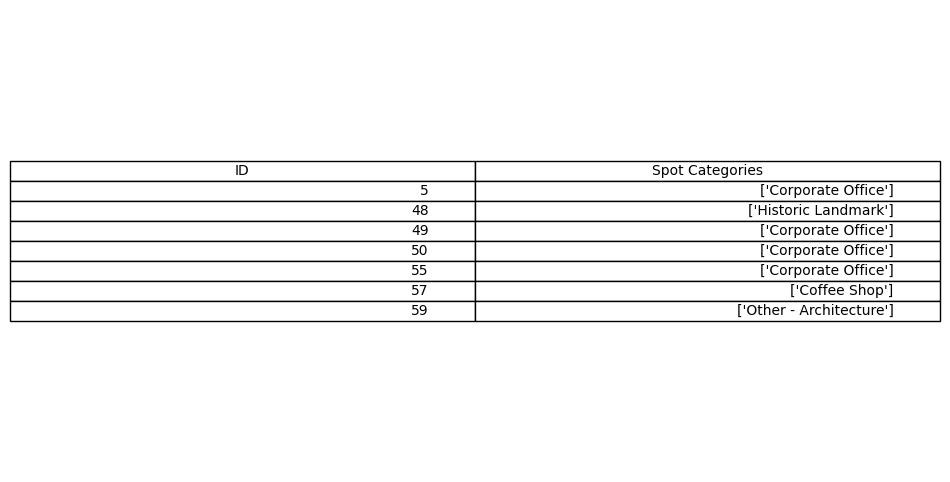

In [4]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

def important(dataset, features):
    return dataset[features].astype(str).apply(lambda row: ''.join(row), axis=1).tolist()

file_path_subset1 = '/content/drive/My Drive/spots_subset1.csv'
df_subset1 = pd.read_csv(file_path_subset1)

features = ['lng', 'lat', 'photos_count', 'checkins_count', 'users_count', 'radius_meters', 'highlights_count']
df_subset1['important_features'] = important(df_subset1, features)
cm = CountVectorizer().fit_transform(df_subset1['important_features'])
cs = cosine_similarity(cm)

# Target POI(2,50,600)
POI = '50'
similar_POIs = list(enumerate(cs[int(POI)]))
sorted_similar_POIs = sorted(similar_POIs, key=lambda x: x[1], reverse=True)[1:]

file_path_subset2 = '/content/drive/My Drive/spots_subset2.csv'
df_subset2 = pd.read_csv(file_path_subset2, encoding='latin1')

merged_df = pd.merge(df_subset1, df_subset2, left_on='id', right_on='place_id', how='left')

table_data = []
for POI_index, similarity in sorted_similar_POIs[:7]:
    id = df_subset1.loc[POI_index, 'id']
    spot_categories = df_subset1.loc[POI_index, 'spot_categories']
    category_names = [category['name'] for category in eval(spot_categories)]
    table_data.append((id, category_names))

plt.figure(figsize=(10, 6))
table = plt.table(cellText=table_data, colLabels=['ID', 'Spot Categories'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.axis('off')
plt.show()
